<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #2c3e50;
    margin-top: 20px;
    letter-spacing: 1px;
">
    🚢 Titanic Survival Prediction
</h1>


### This is the Simplest Project 

The dataset can be available anywhere including libraries.

In [28]:
# importing libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer

In [29]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df.shape

(891, 12)

In [31]:
# converting the columns name into lowercase
df.columns=df.columns.str.lower()
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
# checking for null values
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [34]:
# dropping the column cabin
df=df.drop('cabin',axis=1)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [35]:
# imputing the age column with the knn imputer
imputer=KNNImputer()
df['age']=imputer.fit_transform(df[['age']])
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
# imputing the embarked column with the mode
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
df.embarked.value_counts()

embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [38]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

In [39]:
cat_le=['sex', 'embarked']
le=LabelEncoder()
df[cat_le]=df[cat_le].apply(le.fit_transform)
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    int32  
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(2)
memory usage: 69.7+ KB


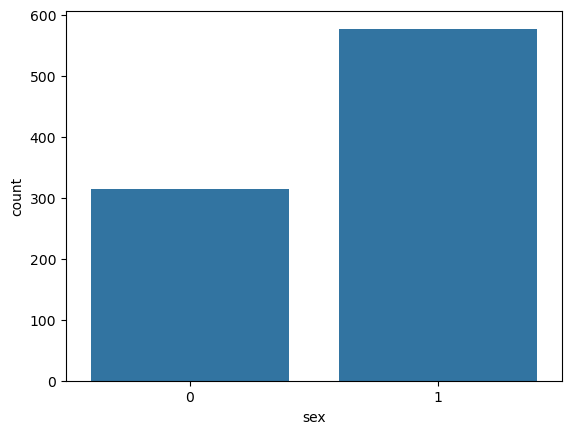

In [41]:
# Data visualization
sns.countplot(x='sex', data=df)
plt.show()

In [42]:
# seperating x and y
x=df.drop(columns=['passengerid','name','ticket','survived'],axis=1)
y=df['survived']
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [43]:
# training the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [44]:
# using the model
model=LogisticRegression()
model.fit(x,y)

LogisticRegression()

In [46]:
# checking the accuracy
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  0.8061797752808989
